http://medicalsegmentation.com/covid19/

0 - background <br>
1 - ground-glass <br>
2 - consolidation <br>
3 - pleural efusion <br>

In [3]:
import sys ,os
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
import configparser
import pandas as pd
from utils import *

config = configparser.ConfigParser()
config.read("../../config.ini")


['../../config.ini']

In [5]:
COVID_SEG_1_PATH = config['PATHS']['COVID_SEG_1_PATH']

COVID_SEG_1_TRAINIG_IMAGES_PATH = os.path.join(COVID_SEG_1_PATH, "tr_im.nii")
COVID_SEG_1_TRAINING_INFECTION_MASKS_PATH = os.path.join(COVID_SEG_1_PATH, "tr_mask.nii")
COVID_SEG_1_TRAINING_LUNG_MASKS_PATH = os.path.join(COVID_SEG_1_PATH, "tr_lungmasks_updated.nii")
COVID_SEG_1_METADATA_PATH = os.path.join(COVID_SEG_1_PATH, "Test-Images-Clinical-Details.csv")

# Metadata

In [6]:
covid_seg_1_metadata_df = pd.read_csv(COVID_SEG_1_METADATA_PATH)
print(covid_seg_1_metadata_df.shape)
covid_seg_1_metadata_df.head()

(106, 7)


,SIRM Case,Slice position in .nii.gz,Patient age,Patient Sex (Male = 0 Female = 1),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,60.0,80.0,0.0,NaN,NaN,NaN
1,2,2.0,62.0,0.0,NaN,NaN,NaN
2,2,89.0,NaN,NaN,NaN,NaN,NaN
3,3,72.0,57.0,0.0,NaN,NaN,NaN
4,3,70.0,NaN,NaN,NaN,NaN,NaN


In [9]:
print("Unique slice positions: {0}".format(covid_seg_1_metadata_df['Slice position in .nii.gz'].nunique()))
print("Unique SIRM Case: {0}".format(covid_seg_1_metadata_df['SIRM Case'].nunique()))

Unique slice positions: 100
Unique SIRM Case: 44


In [4]:
covid_seg_1_metadata_df[['Slice position in .nii.gz']].describe()

,Slice position in .nii.gz
count,101.000000
mean,49.485149
std,28.866456
min,0.000000
25%,25.000000
50%,49.000000
75%,74.000000
max,99.000000


# Data

In [5]:
training_images_nii = read_nii(COVID_SEG_1_TRAINIG_IMAGES_PATH)
training_lung_masks_nii = read_nii(COVID_SEG_1_TRAINING_LUNG_MASKS_PATH)
training_infection_masks_nii = read_nii(COVID_SEG_1_TRAINING_INFECTION_MASKS_PATH)

print(training_images_nii.shape)
print(training_lung_masks_nii.shape)
print(training_infection_masks_nii.shape)

(512, 512, 100)
(512, 512, 100)
(512, 512, 100)


### Infection Mask

In [6]:
infection_labels_list = training_infection_masks_nii.flatten()
infection_labels_df = pd.DataFrame(infection_labels_list, columns=['infection_mask'])
infection_labels_df = infection_labels_df.groupby(["infection_mask"])["infection_mask"].agg("count").to_frame(name='count').reset_index()
infection_labels_df.head(10)

,infection_mask,count
0,0.0,24394464
1,1.0,1196461
2,2.0,589210
3,3.0,34265


### Lung mask

In [7]:
lung_labels_list = training_lung_masks_nii.flatten()
lung_labels_df = pd.DataFrame(lung_labels_list, columns=['lung_mask'])
lung_labels_df = lung_labels_df.groupby(["lung_mask"])["lung_mask"].agg("count").to_frame(name='count').reset_index()
lung_labels_df.head(10)

,lung_mask,count
0,0.0,19190107
1,1.0,3796970
2,2.0,3227323


In [8]:
sample_ct = training_images_nii[...,0]
sample_ct_mask = training_lung_masks_nii[...,0]
sample_ct_infection_mask = training_infection_masks_nii[...,0]
sample_ct.shape

(512, 512)

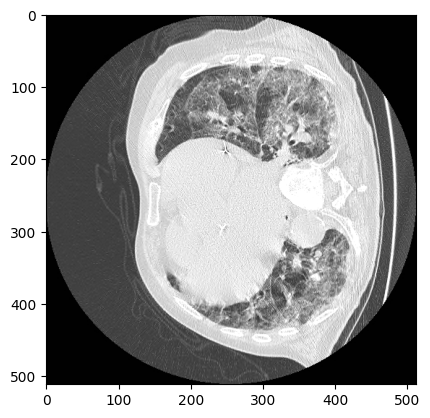

In [9]:
plt.imshow(sample_ct, cmap="gray")

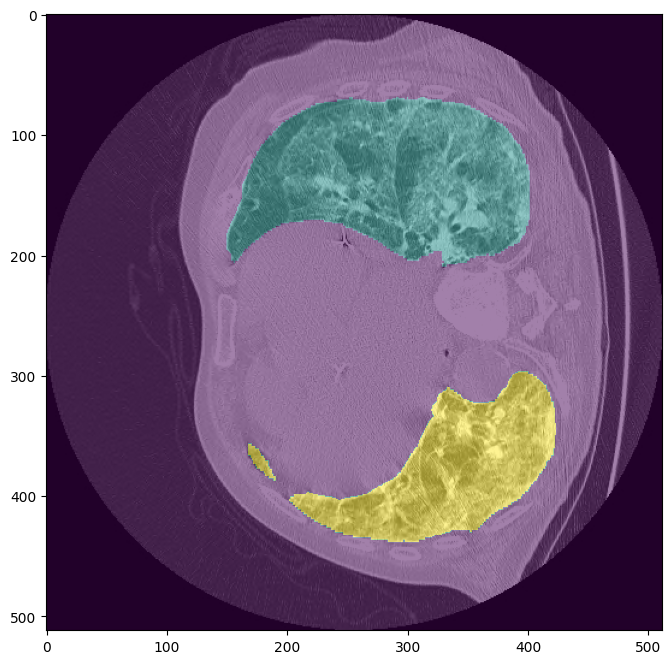

In [10]:
fig = plt.figure(figsize=(10,8))
plt.imshow(training_images_nii[..., 0], cmap="gray")
plt.imshow(training_lung_masks_nii[..., 0], cmap="viridis", alpha=0.5)
#plt.imshow(training_infection_masks_nii[..., 0], cmap="jet", alpha=0.5)

(array([[512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [324.,  11.,  12., ...,   6.,  17., 116.],
        [344.,   9.,  13., ...,   4.,  21.,  93.],
        [359.,  18.,   9., ...,   8.,  22.,  65.]]),
 array([-1031.18903941,  -890.02315896,  -748.85727851,  -607.69139806,
         -466.52551761,  -325.35963716,  -184.19375671,   -43.02787626,
           98.13800419,   239.30388464,   380.46976509]),
 <a list of 512 BarContainer objects>)

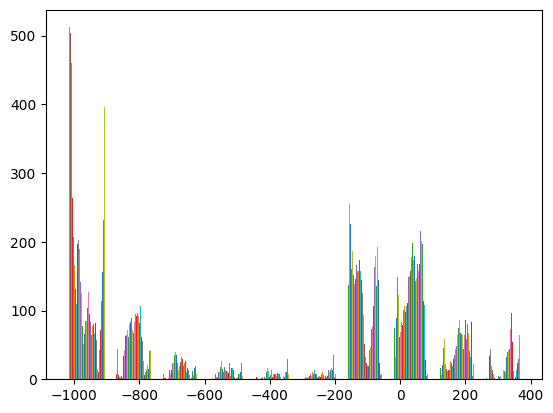

In [11]:
plt.hist(training_images_nii[:,:,20])

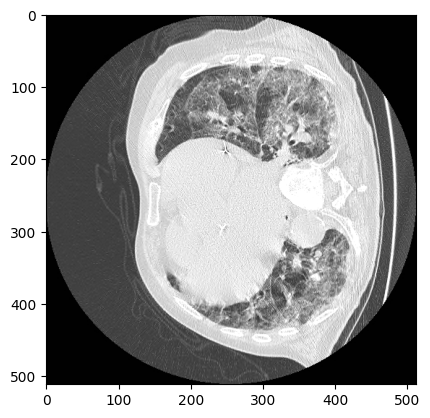

In [13]:
normalized_sample = normalize(sample_ct)
plt.imshow(normalized_sample, cmap="gray")

(array([[466.,   0.,  46., ...,   0.,   0.,   0.],
        [448.,   4.,  60., ...,   0.,   0.,   0.],
        [434.,   1.,  77., ...,   0.,   0.,   0.],
        ...,
        [434.,   3.,  32., ...,   0.,   0.,   0.],
        [448.,   1.,  24., ...,   0.,   0.,   0.],
        [466.,   1.,  16., ...,   0.,   0.,   0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 512 BarContainer objects>)

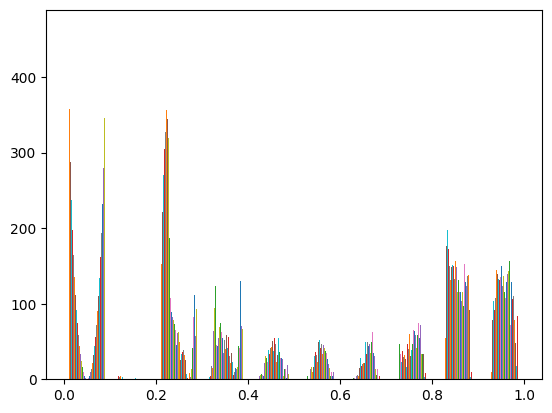

In [14]:
plt.hist(normalized_sample)

In [ ]:
rgb_sample = nii_to_rgb(sample_ct, sample_ct_mask, sample_ct_infection_mask)